In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # k-Means for Vector Quantization

 Based on [Color Quantization using K-Means](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html)
 from [https://scikit-learn.org/](https://scikit-learn.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from skimage import data
from skimage.color import rgb2lab, lab2rgb
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from time import time 

# Demo image from sci-kit.
# img_rgb = np.array(data.chelsea(), dtype = np.float64)/255.0
img_rgb = np.array(load_sample_image('china.jpg'), dtype = np.float64)/255.0

# Convert to L*a*b* space.
img_lab = rgb2lab(img_rgb)

# Flatten to M*N x 3
img_rgb_ = np.asarray(list(map(lambda i: img_rgb[:, :, i].flatten(), range(3))))
img_lab_ = np.asarray(list(map(lambda i: img_lab[:, :, i].flatten(), range(3))))


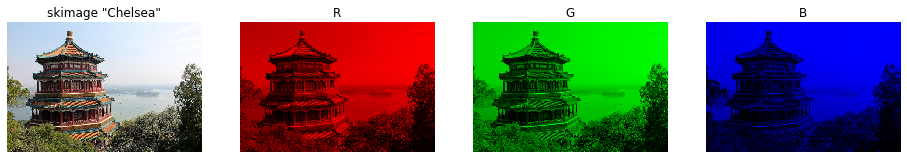

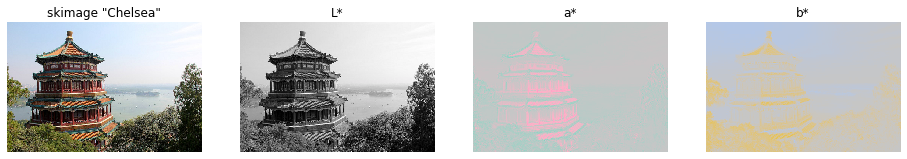

In [2]:
# Plot image and RGB data 
fig = plt.figure(figsize = (4*4, 4))
c = ['R', 'G', 'B']
for i in range(4):
    if i == 0:
        ax = [fig.add_subplot(1, 4, 1)]
        ax[i].imshow(img_rgb)
        ax[i].set_title('skimage "Chelsea"')
    else:
        ax.append(fig.add_subplot(1, 4, i + 1))
        img = np.zeros(img_rgb.shape)
        img[:, :, i - 1] = img_rgb[:, :, i - 1]
        ax[i].imshow(img)
        ax[i].set_title(c[i - 1])

    ax[i].set_aspect(1)
    ax[i].set_axis_off()

# Plot image and LAB data 
fig = plt.figure(figsize = (4*4, 4))
c = ['L*', 'a*', 'b*']
for i in range(4):
    if i == 0:
        ax = [fig.add_subplot(1, 4, 1)]
        ax[i].imshow(img_rgb)
        ax[i].set_title('skimage "Chelsea"')
    else:
        ax.append(fig.add_subplot(1, 4, i + 1))
        img = np.zeros(img_lab.shape)
        img[:, :, i - 1] = img_lab[:, :, i - 1]

        # Some lightness to show the a*, b* colours
        if i > 1:
            img[:, :, 0] = 80
        
        img = lab2rgb(img)
        ax[i].imshow(img)
        ax[i].set_title(c[i - 1])

    ax[i].set_aspect(1)
    ax[i].set_axis_off()

#fig.show()


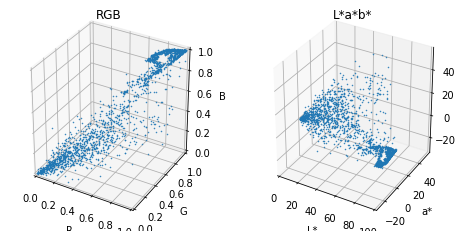

In [3]:
# Downsample the image for speed
i = np.random.randint(0, img_rgb_.shape[1], 2000)
img_rgb__ = img_rgb_[:, i]
img_lab__ = img_lab_[:, i]

# Plot image data in colorspace
fig = plt.figure(figsize = (8, 4))
ax = [fig.add_subplot(1, 2, 1, projection = '3d')]
ax[0].plot(img_rgb__[0, :], img_rgb__[1, :], img_rgb__[2, :], linestyle = 'none', marker = '.', markersize = 1)
ax[0].set_xlabel('R'); ax[0].set_ylabel('G'); ax[0].set_zlabel('B')
_ = ax[0].set(xlim = (0, 1), ylim = (0, 1), zlim = (0, 1))
_ = ax[0].set_title('RGB')

ax.append(fig.add_subplot(1, 2, 2, projection = '3d'))
ax[1].plot(img_lab__[0, :], img_lab__[1, :], img_lab__[2, :], linestyle = 'none', marker = '.', markersize = 1)
ax[1].set_xlabel('L*'); ax[1].set_ylabel('a*'); ax[1].set_zlabel('b*')
# _ = ax[1].set(xlim = (0, 100), ylim = (-128, 128), zlim = (-128, 128))
_ = ax[1].set(xlim = (0, 100))
_ = ax[1].set_title('L*a*b*')

# Max axis limits
i = np.min([ax[1].get_ylim()[0], ax[1].get_zlim()[0]])
j = np.max([ax[1].get_ylim()[1], ax[1].get_zlim()[1]])
_ = ax[1].set(ylim = (i, j))
_ = ax[1].set(zlim = (i, j))

#fig.show()


In [4]:
# Fit model to color data using k-means clustering
t0 = time()
n_colours = 6
kmeans_rgb = KMeans(n_clusters = n_colours, random_state = 0).fit(img_rgb__.transpose())
kmeans_lab = KMeans(n_clusters = n_colours, random_state = 0).fit(img_lab__.transpose())
print(f"Fitting with k-means clustering: {time() - t0: .3f} s.")


Fitting with k-means clustering:  0.249 s.


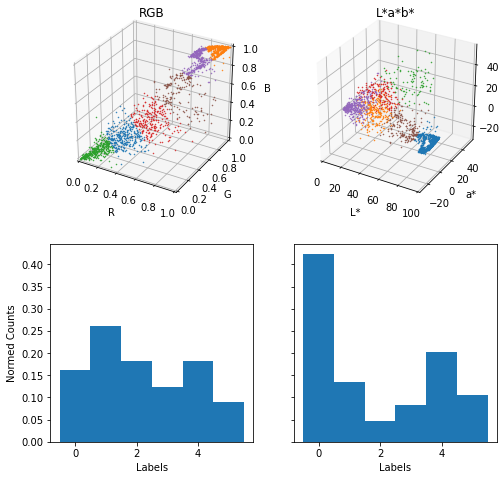

In [5]:
# Plot labelled colour data
# RGB
fig = plt.figure(figsize = (8, 8))
ax = [fig.add_subplot(2, 2, 1, projection = '3d')]
for i in range(n_colours):
    j = img_rgb__[:, kmeans_rgb.labels_ == i]
    ax[0].plot(j[0, :], j[1, :], j[2, :], linestyle = 'none', marker = '.', markersize = 1)

ax[0].set_xlabel('R'); ax[0].set_ylabel('G'); ax[0].set_zlabel('B')
_ = ax[0].set(xlim = (0, 1), ylim = (0, 1), zlim = (0, 1))
_ = ax[0].set_title('RGB')

# LAB
ax.append(fig.add_subplot(2, 2, 2, projection = '3d'))
for i in range(n_colours):
    j = img_lab__[:, kmeans_lab.labels_ == i]
    ax[1].plot(j[0, :], j[1, :], j[2, :], linestyle = 'none', marker = '.', markersize = 1)

ax[1].set_xlabel('L*'); ax[1].set_ylabel('a*'); ax[1].set_zlabel('b*')
_ = ax[1].set_title('L*a*b*')
_ = ax[1].set(xlim = (0, 100))

# Match axis limits
i = np.min([ax[1].get_ylim()[0], ax[1].get_zlim()[0]])
j = np.max([ax[1].get_ylim()[1], ax[1].get_zlim()[1]])
_ = ax[1].set(ylim = (i, j))
_ = ax[1].set(zlim = (i, j))


ax.append(fig.add_subplot(2, 2, 3))
ax[2].hist(kmeans_rgb.labels_, bins = (np.arange(-1, n_colours) + 0.5), density = True)
_ = ax[2].set_xlabel('Labels')
_ = ax[2].set_ylabel('Normed Counts')

ax.append(fig.add_subplot(2, 2, 4))
ax[3].hist(kmeans_lab.labels_, bins = (np.arange(-1, n_colours) + 0.5), density = True)
_ = ax[3].set_xlabel('Labels')
_ = ax[3].tick_params(axis = 'y', labelleft = None)

# Match axis limits
i = np.max([ax[2].get_ylim()[1], ax[3].get_ylim()[1]])
_ = ax[2].set(ylim = (0, i))
_ = ax[3].set(ylim = (0, i))



In [6]:
# Predict labels for remaining image pixels
t0 = time()
img_rgb_kmeans = kmeans_rgb.predict(img_rgb_.transpose())
img_lab_kmeans = kmeans_lab.predict(img_lab_.transpose())
print(f"Labelling remaining data: {time() - t0: .3f} s.")

# Map k-means labels back into image coordinates
# RGB image
img_ = np.empty(img_rgb_.shape)
for i in range(n_colours):
    j = kmeans_rgb.cluster_centers_[i, :]
    img_[:, img_rgb_kmeans == i] = j[:, np.newaxis]

img = np.reshape(img_.transpose(), img_rgb.shape)
img_rgb_kmeans_img = img

# LAB image
img_ = np.empty(img_lab_.shape)
for i in range(n_colours):
    j = kmeans_lab.cluster_centers_[i, :]
    img_[:, img_lab_kmeans == i] = j[:, np.newaxis]

img = np.reshape(img_.transpose(), img_lab.shape)
img = lab2rgb(img)
img_lab_kmeans_img = img



Labelling remaining data:  0.099 s.


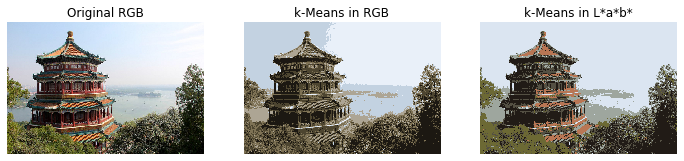

In [7]:
fig = plt.figure(figsize = (3*4, 4))
for i in range(3):
    if i == 0:
        ax = [fig.add_subplot(1, 3, 1)]
        ax[i].imshow(img_rgb)
        ax[i].set_title('Original RGB')
    elif i == 1:
        ax.append(fig.add_subplot(1, 3, i + 1))
        ax[i].imshow(img_rgb_kmeans_img)
        ax[i].set_title('k-Means in RGB')
    else:
        ax.append(fig.add_subplot(1, 3, i + 1))
        ax[i].imshow(img_lab_kmeans_img)
        ax[i].set_title('k-Means in L*a*b*')

    ax[i].set_aspect(1)
    ax[i].set_axis_off()


In [8]:
# Get Tableau-style default colormap
i = np.asarray([cm.get_cmap('tab10')(i) for i in range(n_colours)])
cmap = i[:, :3]

# Map k-means labels back into image coordinates
img_ = np.empty(img_rgb_.shape)
for i in range(n_colours):
    j = cmap[i, :]
    img_[:, img_rgb_kmeans == i] = j[:, np.newaxis]

img = np.reshape(img_.transpose(), img_rgb.shape)
img_rgb_kmeans_img_tab = img

img_ = np.empty(img_lab_.shape)
for i in range(n_colours):
    j = cmap[i, :]
    img_[:, img_lab_kmeans == i] = j[:, np.newaxis]

img = np.reshape(img_.transpose(), img_lab.shape)
img_lab_kmeans_img_tab = img


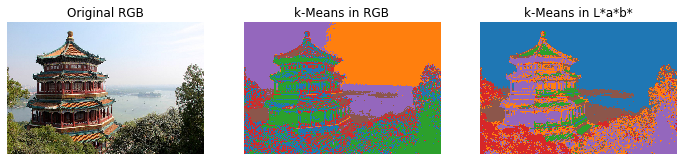

In [9]:
fig = plt.figure(figsize = (3*4, 4))
for i in range(3):
    if i == 0:
        ax = [fig.add_subplot(1, 3, 1)]
        ax[i].imshow(img_rgb)
        ax[i].set_title('Original RGB')
    elif i == 1:
        ax.append(fig.add_subplot(1, 3, i + 1))
        ax[i].imshow(img_rgb_kmeans_img_tab)
        ax[i].set_title('k-Means in RGB')
    else:
        ax.append(fig.add_subplot(1, 3, i + 1))
        ax[i].imshow(img_lab_kmeans_img_tab)
        ax[i].set_title('k-Means in L*a*b*')

    ax[i].set_aspect(1)
    ax[i].set_axis_off()

